In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
data = pd.read_csv("../data/processed/train.csv", header=None, na_filter=False)

## Positive vs Negative Reviews

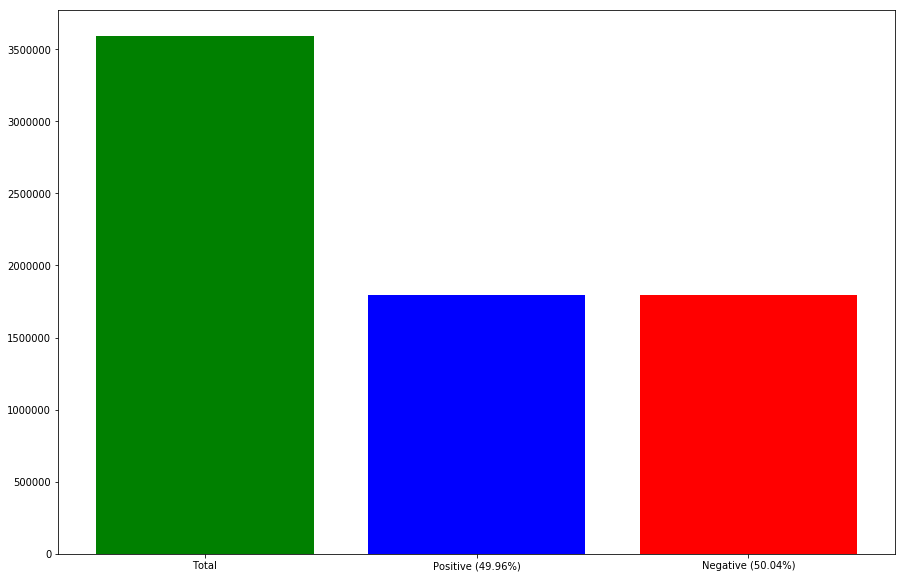

In [2]:
pos = data[data[0] == 1]
neg = data[data[0] == 0]

pos_percent = 100 * pos.shape[0] / data.shape[0]
neg_percent = 100 * neg.shape[0] / data.shape[0]

plt.figure(figsize=(15,10))
plt.bar([0, 1, 2], [len(data), len(pos), len(neg)], color=['g', 'b', 'r'])
plt.xticks([0, 1, 2], ['Total', 'Positive ({:.2f}%)'.format(pos_percent), 'Negative ({:.2f}%)'.format(neg_percent)])
plt.show()

In [3]:
%%capture
from keras.preprocessing.text import Tokenizer

pos_reviews = (pos[1] + " " + pos[2]).values
pos_tokenizer = Tokenizer(num_words=100)

pos_tokenizer.fit_on_texts(pos_reviews)

In [4]:
from keras.preprocessing.text import Tokenizer

neg_reviews = (neg[1] + " " + neg[2]).values
neg_tokenizer = Tokenizer(num_words=100)

neg_tokenizer.fit_on_texts(neg_reviews)

In [5]:
from nltk.corpus import stopwords

stopset = set(stopwords.words('english'))

In [6]:
def sorted_words(tokenizer, opposite_tokenizer=None):
    if opposite_tokenizer:
         tokens = [(word, frequency) for word, frequency in tokenizer.word_counts.items() 
                   if word not in stopset and word not in opposite_tokenizer.word_counts]
    else:
        tokens = [(word, frequency) for word, frequency in tokenizer.word_counts.items() if word not in stopset]
    sorted_words = sorted(tokens, key=lambda item: item[1], reverse=True)
    return list(sorted_words)

## Top 10 positive words

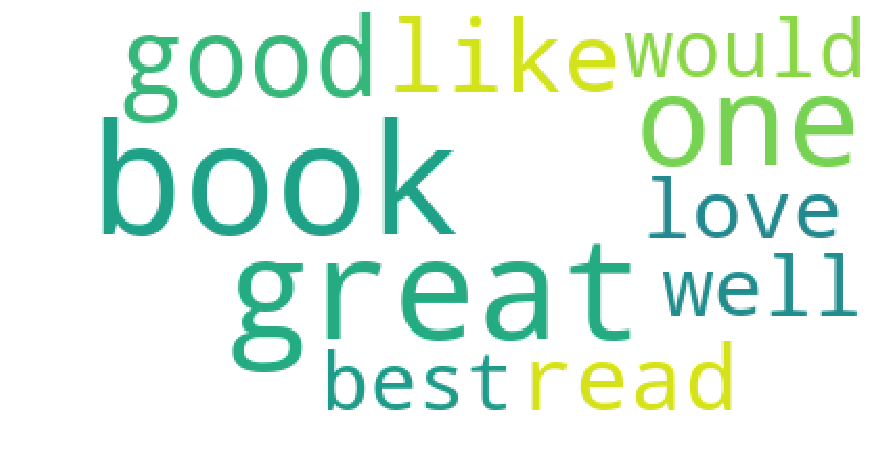

In [7]:
from wordcloud import WordCloud

pos_dict = dict((x, y) for x, y in sorted_words(pos_tokenizer))
pos_word_cloud = WordCloud(background_color="white", max_words=10)
pos_word_cloud.fit_words(pos_dict)

plt.figure(figsize=(15, 10))
plt.imshow(pos_word_cloud)
plt.axis("off")
plt.show()

## Top 10 negative words

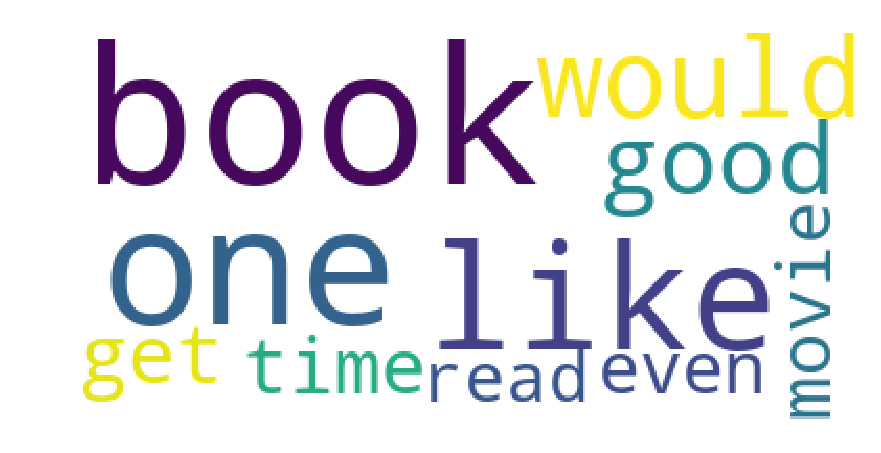

In [8]:
from wordcloud import WordCloud

neg_dict = dict((x, y) for x, y in sorted_words(neg_tokenizer))
neg_word_cloud = WordCloud(background_color="white", max_words=10)
neg_word_cloud.fit_words(neg_dict)

plt.figure(figsize=(15, 10))
plt.imshow(neg_word_cloud)
plt.axis("off")
plt.show()

## Top 10 positive words which are not in negative class

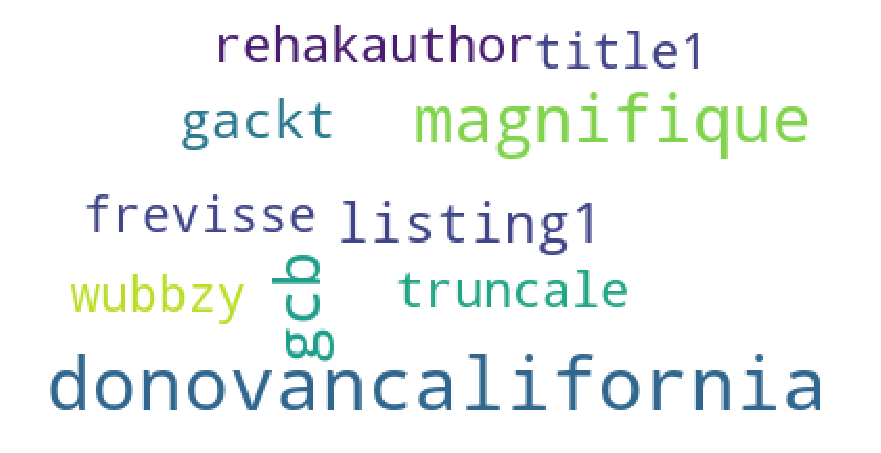

In [9]:
from wordcloud import WordCloud

pos_only_dict = dict((x, y) for x, y in sorted_words(pos_tokenizer, neg_tokenizer))
pos_only_word_cloud = WordCloud(background_color="white", max_words=10)
pos_only_word_cloud.fit_words(pos_only_dict)

plt.figure(figsize=(15, 10))
plt.imshow(pos_only_word_cloud)
plt.axis("off")
plt.show()

## Top 10 negative words which are not in positive class

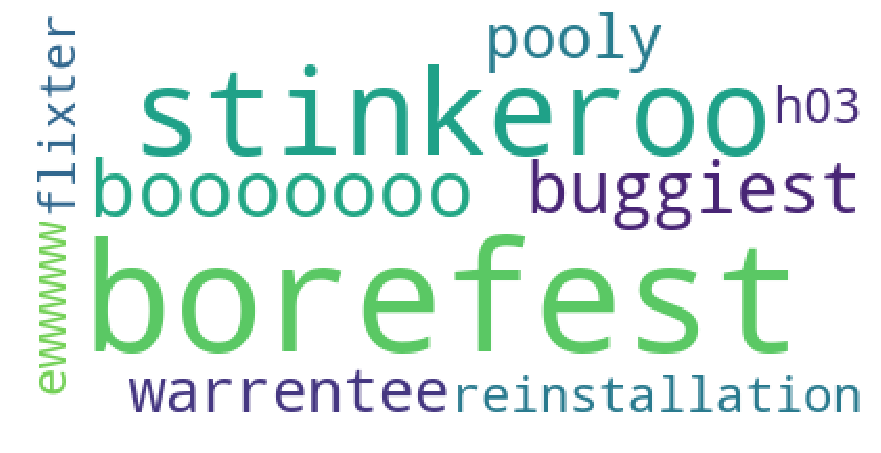

In [10]:
from wordcloud import WordCloud

neg_only_dict = dict((x, y) for x, y in sorted_words(neg_tokenizer, pos_tokenizer))
neg_only_word_cloud = WordCloud(background_color="white", max_words=10)
neg_only_word_cloud.fit_words(neg_only_dict)

plt.figure(figsize=(15, 10))
plt.imshow(neg_only_word_cloud)
plt.axis("off")
plt.show()

## Number of words per review

In [11]:
%%capture
from keras.preprocessing.text import text_to_word_sequence


number_of_words = [len(text_to_word_sequence(row[1] + " " + row[2])) for row in data.itertuples(index=False, name=None)]

In [12]:
print(max(number_of_words))

257


{'boxes': [<matplotlib.lines.Line2D at 0x19982a828>],
 'caps': [<matplotlib.lines.Line2D at 0x199821278>,
 'fliers': [<matplotlib.lines.Line2D at 0x199821ef0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x199821ac8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x19982a978>,
  <matplotlib.lines.Line2D at 0x19982ae10>]}

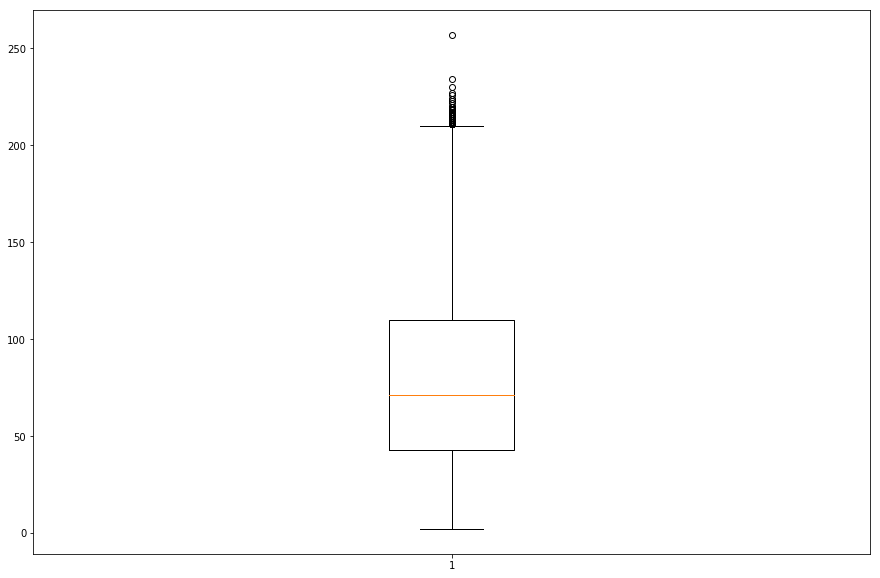

In [13]:
plt.figure(figsize=(15, 10))
plt.boxplot(number_of_words)

(array([3.07785e+05, 9.17435e+05, 7.76703e+05, 5.75140e+05, 4.42243e+05,
        3.05376e+05, 2.15641e+05, 5.00030e+04, 6.02000e+02, 2.00000e+00]),
 array([  2. ,  27.5,  53. ,  78.5, 104. , 129.5, 155. , 180.5, 206. ,
        231.5, 257. ]),
 <a list of 10 Patch objects>)

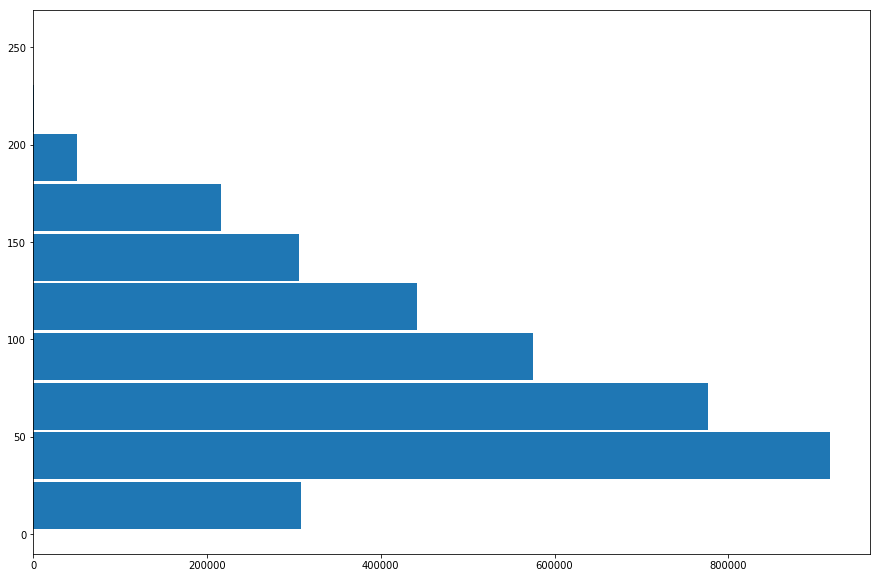

In [14]:
plt.figure(figsize=(15, 10))
plt.hist(number_of_words, orientation='horizontal', rwidth=0.95)